# Deep learning for image classification

This Python notebook explores [deep learning](https://en.wikipedia.org/wiki/Deep_learning)  for neural networks and creates a classification model that maps images of single digit numbers to their corresponding numeric representations.

## Load libraries

Install the [nolearn](https://pythonhosted.org/nolearn/) deep learning Python library. 

This is the main library used for all of our deep learning purposes.

In [1]:
!pip install --user nolearn

Import libraries 

In [2]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn import datasets
from nolearn.dbn import DBN
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

gnumpy: failed to import cudamat. Using npmat instead. No GPU will be used.


## Load data

The data set for this classification model comes from the MNIST database. It is a large database of handwritten numbers that uses real-world data.

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/")

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Training set images and labels.

In [4]:
mnist_images = mnist.train.images
mnist_labels = mnist.train.labels

Split the data into training and testing data sets.

trX = Training set images, trY = Training set labels, teX = Testing set images, teY = Testing set labels

In [5]:
trX, trY, teX, teY = train_test_split(mnist_images, mnist_labels.astype("int0"), test_size = 0.33)

Output number of images in each data set.

In [6]:
print "Number of images for training:", trX.shape[0]
print "Number of images used for testing:", teX.shape[0]

Number of images for training: 36850
Number of images used for testing: 36850


## Train the classification model for pattern recognition

Uses the Deep Belief Network solves to train a pattern recognition model for handwritten numbers.

The most important values to notice when creating a Deep Belief Network are the learning rate and the epochs. 

The [learning rate](https://www.coursera.org/learn/machine-learning/lecture/3iawu/gradient-descent-in-practice-ii-learning-rate) dictates the length of the steps the algorithm will take during [Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent). The lower the value of the learning rate, the more steps the algorithm will take. Generally, the lower the value, the longer the model will take to run.

[Epochs](https://stackoverflow.com/questions/31155388/meaning-of-an-epoch-in-neural-networks-training) are another word for the number of times an algorithm iterates over the training data set. Generally, the more epochs, the more accurate the model. More epochs also means the model will take longer to run.

In this initial version of our Deep Belief Network, we will use 10 epochs and set the learning rate to 0.3. We can modify these values in the future and determine which combination gives us the most accurate model.

In [26]:
dbn = DBN(
    [trX.shape[1], 300, 10], 
    learn_rates = 0.1,
    learn_rate_decays = 0.9,
    epochs = 10,
    verbose = 1)
dbn.fit(trX, teX)

[DBN] fitting X.shape=(36850, 784)
[DBN] layers [784, 300, 10]
[DBN] Fine-tune...


100%


Epoch 1:
  loss 0.239716516973
  err  0.0720380434783
  (0:00:13)


100%


Epoch 2:
  loss 0.0901291098122
  err  0.027472826087
  (0:00:13)


100%


Epoch 3:
  loss 0.0597021913366
  err  0.0182608695652
  (0:00:10)


100%


Epoch 4:
  loss 0.0449659354977
  err  0.0132336956522
  (0:00:11)


100%


Epoch 5:
  loss 0.0293854554726
  err  0.00779891304348
  (0:00:10)


100%


Epoch 6:
  loss 0.0215499563985
  err  0.00491847826087
  (0:00:09)


100%


Epoch 7:
  loss 0.017547233537
  err  0.00377717391304
  (0:00:09)


100%


Epoch 8:
  loss 0.0144892751885
  err  0.00285326086957
  (0:00:10)


100%


Epoch 9:
  loss 0.0122214940594
  err  0.00157608695652
  (0:00:10)


100%


Epoch 10:
  loss 0.00927805724048
  err  0.00100543478261
  (0:00:09)


Notice that through each iteration the loss and error decreases.

## Testing the model – Version 1

Performance of the Classification Model:

In [27]:
predictions = dbn.predict(trY)
print classification_report(teY, predictions)
print 'The accuracy is:', accuracy_score(teY, predictions)

             precision    recall  f1-score   support

          0       0.98      0.98      0.98      1850
          1       0.98      0.99      0.99      1954
          2       0.98      0.97      0.98      1788
          3       0.98      0.97      0.97      1870
          4       0.98      0.97      0.98      1768
          5       0.98      0.96      0.97      1622
          6       0.97      0.99      0.98      1796
          7       0.98      0.98      0.98      1898
          8       0.97      0.97      0.97      1798
          9       0.97      0.97      0.97      1806

avg / total       0.98      0.98      0.98     18150

The accuracy is: 0.977024793388


This accuracy is quite good for our first attempt. Notice that the model performs the best when attempting to identify the number '1' and the worst when attempting to identify the number '9'. 

Now to see our model in action. We need to create a function that generates a random image of a number and feeds it to the classification model for identification. When called, an image will appear on screen along with the model's guess for what digit is being represented. Each function call will produce a randomized image.

In [9]:
def displayImage():
    i = np.random.choice(np.arange(0, len(teY)), size = (1,))
    pred = dbn.predict(np.atleast_2d(trY[i]))
    image = (trY[i] * 255).reshape((28, 28)).astype("uint8")
    imgplot = plt.imshow(image)
    imgplot.set_cmap('gray')
    print "Actual digit:", teY[i][0]
    print "Classification Model prediction:", pred[0]

Function call

Actual digit: 0
Classification Model prediction: 0


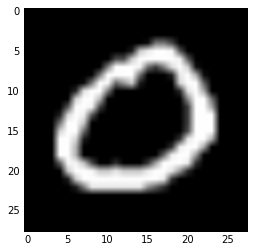

In [10]:
displayImage()

Actual digit: 9
Classification Model prediction: 9


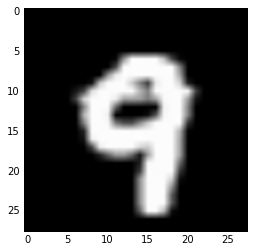

In [11]:
displayImage()

Actual digit: 2
Classification Model prediction: 2


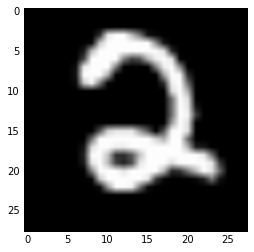

In [12]:
displayImage()

Actual digit: 4
Classification Model prediction: 4


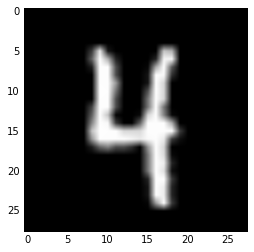

In [13]:
displayImage()

## Improving the classification model – Version 2: Deep Belief Network modifications

Even though the initial model has close to 98% accuracy, we can always make our model more accurate. One potential way of increasing the accuracy of the classification model is to make modifications to the way we train the Deep Belief Network. 

To make the model more accurate, I decreased the learning rate from 0.3 to 0.2 in order to allow for smaller steps during Gradient Descent. I also increased the number of epochs from 10 to 50.

In [14]:
dbn = DBN(
    [trX.shape[1], 300, 10], 
    learn_rates = 0.2, # Modified Field
    learn_rate_decays = 0.9,
    epochs = 50, # Modified Field
    verbose = 1)
dbn.fit(trX, teX)

[DBN] fitting X.shape=(36850, 784)
[DBN] layers [784, 300, 10]
[DBN] Fine-tune...


100%


Epoch 1:
  loss 0.245331574678
  err  0.0768206521739
  (0:00:06)


100%


Epoch 2:
  loss 0.112449734
  err  0.0345923913043
  (0:00:06)


100%


Epoch 3:
  loss 0.0771406240202
  err  0.0242391304348
  (0:00:06)


100%


Epoch 4:
  loss 0.0498591161151
  err  0.0154891304348
  (0:00:06)


100%


Epoch 5:
  loss 0.0422641907953
  err  0.012527173913
  (0:00:07)


100%


Epoch 6:
  loss 0.0275009136663
  err  0.00828804347826
  (0:00:10)


100%


Epoch 7:
  loss 0.0176217182591
  err  0.00486413043478
  (0:00:09)


100%


Epoch 8:
  loss 0.0144789193365
  err  0.0035597826087
  (0:00:11)


100%


Epoch 9:
  loss 0.0101878757821
  err  0.00192934782609
  (0:00:11)


100%


Epoch 10:
  loss 0.00743460574501
  err  0.00111413043478
  (0:00:10)


100%


Epoch 11:
  loss 0.00722086577646
  err  0.000733695652174
  (0:00:09)


100%


Epoch 12:
  loss 0.00656612960065
  err  0.000516304347826
  (0:00:09)


100%


Epoch 13:
  loss 0.00591568395551
  err  0.000244565217391
  (0:00:10)


100%


Epoch 14:
  loss 0.0059957155148
  err  0.000380434782609
  (0:00:10)


100%


Epoch 15:
  loss 0.00523702993301
  err  0.000190217391304
  (0:00:10)


100%


Epoch 16:
  loss 0.00530744186137
  err  0.000163043478261
  (0:00:10)


100%


Epoch 17:
  loss 0.00549753298365
  err  0.000135869565217
  (0:00:09)


100%


Epoch 18:
  loss 0.0053849575125
  err  0.000190217391304
  (0:00:11)


100%


Epoch 19:
  loss 0.00529936185269
  err  8.15217391304e-05
  (0:00:10)


100%


Epoch 20:
  loss 0.00538646162275
  err  0.000135869565217
  (0:00:10)


100%


Epoch 21:
  loss 0.0055015861491
  err  0.000135869565217
  (0:00:11)


100%


Epoch 22:
  loss 0.00547186322966
  err  8.15217391304e-05
  (0:00:11)


100%


Epoch 23:
  loss 0.00537674024529
  err  0.000108695652174
  (0:00:11)


100%


Epoch 24:
  loss 0.00528302281812
  err  5.4347826087e-05
  (0:00:10)


100%


Epoch 25:
  loss 0.00535650144149
  err  0.000190217391304
  (0:00:11)


100%


Epoch 26:
  loss 0.00540329085876
  err  0.000135869565217
  (0:00:11)


100%


Epoch 27:
  loss 0.00550884512273
  err  8.15217391304e-05
  (0:00:11)


100%


Epoch 28:
  loss 0.00515923653172
  err  2.71739130435e-05
  (0:00:11)


100%


Epoch 29:
  loss 0.00513799226893
  err  5.4347826087e-05
  (0:00:10)


100%


Epoch 30:
  loss 0.00541836882911
  err  5.4347826087e-05
  (0:00:11)


100%


Epoch 31:
  loss 0.00538959517326
  err  5.4347826087e-05
  (0:00:11)


100%


Epoch 32:
  loss 0.00532868665633
  err  5.4347826087e-05
  (0:00:10)


100%


Epoch 33:
  loss 0.00533508881582
  err  8.15217391304e-05
  (0:00:09)


100%


Epoch 34:
  loss 0.0053493516712
  err  5.4347826087e-05
  (0:00:11)


100%


Epoch 35:
  loss 0.00507452627644
  err  2.71739130435e-05
  (0:00:12)


100%


Epoch 36:
  loss 0.00539826163982
  err  5.4347826087e-05
  (0:00:10)


100%


Epoch 37:
  loss 0.00538731241943
  err  8.15217391304e-05
  (0:00:10)


100%


Epoch 38:
  loss 0.00531574129755
  err  5.4347826087e-05
  (0:00:10)


100%


Epoch 39:
  loss 0.00520042221922
  err  5.4347826087e-05
  (0:00:09)


100%


Epoch 40:
  loss 0.00537245702252
  err  5.4347826087e-05
  (0:00:10)


100%


Epoch 41:
  loss 0.00528781767003
  err  0.0
  (0:00:09)


100%


Epoch 42:
  loss 0.00514637651863
  err  5.4347826087e-05
  (0:00:09)


100%


Epoch 43:
  loss 0.00532441747911
  err  0.0
  (0:00:09)


100%


Epoch 44:
  loss 0.00532938117354
  err  5.4347826087e-05
  (0:00:11)


100%


Epoch 45:
  loss 0.00534506958535
  err  5.4347826087e-05
  (0:00:11)


100%


Epoch 46:
  loss 0.00526336470801
  err  0.0
  (0:00:10)


100%


Epoch 47:
  loss 0.00535301436225
  err  2.71739130435e-05
  (0:00:09)


100%


Epoch 48:
  loss 0.00543311915725
  err  0.0
  (0:00:11)


100%


Epoch 49:
  loss 0.00533884884749
  err  0.0
  (0:00:11)


100%


Epoch 50:
  loss 0.00523416780239
  err  2.71739130435e-05
  (0:00:11)


Notice: In general, the loss and error both decrease over time.

## Testing the model – Version 2

Performance of the updated Classification Model:

In [15]:
predictions = dbn.predict(trY)
print classification_report(teY, predictions)
print 'The accuracy is:', accuracy_score(teY, predictions)

             precision    recall  f1-score   support

          0       0.98      0.99      0.99      1850
          1       0.99      0.99      0.99      1954
          2       0.98      0.98      0.98      1788
          3       0.98      0.97      0.97      1870
          4       0.98      0.98      0.98      1768
          5       0.97      0.96      0.97      1622
          6       0.98      0.99      0.98      1796
          7       0.98      0.98      0.98      1898
          8       0.98      0.98      0.98      1798
          9       0.98      0.98      0.98      1806

avg / total       0.98      0.98      0.98     18150

The accuracy is: 0.979504132231


The model has gained about 0.5% accuracy by making these small changes to the Deep Belief Network. Notice that the model still identifies the number '1' approximately as well as the initial model. The number '9', which the initial model had the toughest time identifying, has seen an approximately 2% increase in precision.

Actual digit: 6
Classification Model prediction: 6


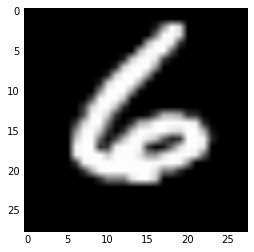

In [16]:
displayImage()

Actual digit: 7
Classification Model prediction: 7


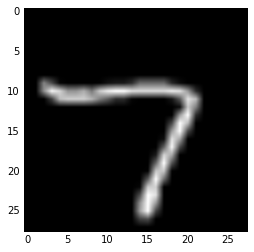

In [17]:
displayImage()

Actual digit: 3
Classification Model prediction: 3


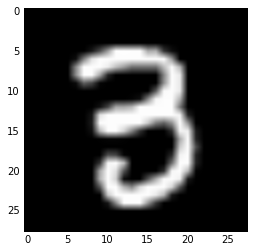

In [18]:
displayImage()

Actual digit: 2
Classification Model prediction: 2


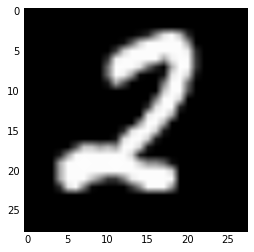

In [28]:
displayImage()

## Improving the classification model – Version 3: Dropout

[Dropout](https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf) regularization is a technique used for Neural Networks and Deep Learning models that is aimed at reducing [overfitted](https://en.wikipedia.org/wiki/Overfitting) models. 

Overfitting is a symptom of a poorly-performing model. The previous versions of our model were very successful so it is unlikely that they overfit data in any significant manner, but it is worth experimenting with the dropout rate to see if our model will perform better. 

To change the dropout rate, we will need to include dropouts in our Deep Belief Network. As a test, we will set dropouts to 0.1.

In [20]:
dbn = DBN(
    [trX.shape[1], 300, 10], 
    learn_rates = 0.2,
    learn_rate_decays = 0.9,
    dropouts = 0.2, # Added Field
    epochs = 50,
    verbose = 1)
dbn.fit(trX, teX)

[DBN] fitting X.shape=(36850, 784)
[DBN] layers [784, 300, 10]
[DBN] Fine-tune...


100%


Epoch 1:
  loss 0.338939138871
  err  0.106875
  (0:00:15)


100%


Epoch 2:
  loss 0.195103865829
  err  0.0599184782609
  (0:00:11)


100%
2%

Epoch 3:
  loss 0.148207067582
  err  0.0461956521739
  (0:00:11)


100%


Epoch 4:
  loss 0.12567528581
  err  0.0394836956522
  (0:00:12)


100%


Epoch 5:
  loss 0.105877843287
  err  0.0338586956522
  (0:00:11)


100%


Epoch 6:
  loss 0.097013116087
  err  0.0310054347826
  (0:00:11)


100%


Epoch 7:
  loss 0.0876598161418
  err  0.0281793478261
  (0:00:13)


100%


Epoch 8:
  loss 0.0744491284575
  err  0.0245380434783
  (0:00:12)


100%


Epoch 9:
  loss 0.0670177717304
  err  0.0217663043478
  (0:00:16)


100%


Epoch 10:
  loss 0.0603012014464
  err  0.0196739130435
  (0:00:13)


100%


Epoch 11:
  loss 0.0612342748256
  err  0.0198913043478
  (0:00:12)


100%


Epoch 12:
  loss 0.0540495523203
  err  0.0172282608696
  (0:00:15)


100%


Epoch 13:
  loss 0.0525335162894
  err  0.0170652173913
  (0:00:13)


100%


Epoch 14:
  loss 0.0499246919366
  err  0.0157065217391
  (0:00:14)


100%


Epoch 15:
  loss 0.0460003649605
  err  0.0144836956522
  (0:00:15)


100%


Epoch 16:
  loss 0.0453480097279
  err  0.0142934782609
  (0:00:14)


100%


Epoch 17:
  loss 0.0419038816768
  err  0.0126630434783
  (0:00:15)


100%


Epoch 18:
  loss 0.0421099580241
  err  0.0133423913043
  (0:00:13)


100%


Epoch 19:
  loss 0.0408866979166
  err  0.0130706521739
  (0:00:12)


100%


Epoch 20:
  loss 0.0428550025683
  err  0.013097826087
  (0:00:11)


100%


Epoch 21:
  loss 0.0395127671386
  err  0.0121195652174
  (0:00:13)


100%


Epoch 22:
  loss 0.036170082451
  err  0.0111956521739
  (0:00:12)


100%


Epoch 23:
  loss 0.0364663782023
  err  0.0109510869565
  (0:00:13)


100%


Epoch 24:
  loss 0.0364050370034
  err  0.0109510869565
  (0:00:11)


100%


Epoch 25:
  loss 0.0341726050095
  err  0.0100543478261
  (0:00:13)


100%


Epoch 26:
  loss 0.0359977609385
  err  0.0103260869565
  (0:00:12)


100%


Epoch 27:
  loss 0.0351072474205
  err  0.010625
  (0:00:13)


100%
1%

Epoch 28:
  loss 0.0342580040961
  err  0.00940217391304
  (0:00:12)


100%


Epoch 29:
  loss 0.0341090728938
  err  0.00978260869565
  (0:00:12)


100%


Epoch 30:
  loss 0.0344602416529
  err  0.0102173913043
  (0:00:13)


100%


Epoch 31:
  loss 0.0338562404729
  err  0.0104619565217
  (0:00:12)


100%


Epoch 32:
  loss 0.0318411499809
  err  0.00910326086957
  (0:00:12)


100%


Epoch 33:
  loss 0.0325392702165
  err  0.00961956521739
  (0:00:12)


100%


Epoch 34:
  loss 0.0318605553351
  err  0.00896739130435
  (0:00:12)


100%


Epoch 35:
  loss 0.0326005360776
  err  0.00945652173913
  (0:00:12)


100%


Epoch 36:
  loss 0.0313784426609
  err  0.00913043478261
  (0:00:12)


100%


Epoch 37:
  loss 0.0340211173455
  err  0.00991847826087
  (0:00:13)


100%


Epoch 38:
  loss 0.0301000024382
  err  0.00885869565217
  (0:00:11)


100%


Epoch 39:
  loss 0.0313753881224
  err  0.00875
  (0:00:12)


100%


Epoch 40:
  loss 0.0303669873467
  err  0.00883152173913
  (0:00:12)


100%


Epoch 41:
  loss 0.0303967494109
  err  0.00839673913043
  (0:00:13)


100%


Epoch 42:
  loss 0.0321368660347
  err  0.00959239130435
  (0:00:10)


100%


Epoch 43:
  loss 0.0323270444945
  err  0.0098097826087
  (0:00:13)


100%


Epoch 44:
  loss 0.0307241290844
  err  0.00880434782609
  (0:00:13)


100%


Epoch 45:
  loss 0.0301203196014
  err  0.00853260869565
  (0:00:13)


100%


Epoch 46:
  loss 0.0315174075026
  err  0.00883152173913
  (0:00:11)


100%


Epoch 47:
  loss 0.0300805074754
  err  0.00891304347826
  (0:00:12)


100%


Epoch 48:
  loss 0.0331219131605
  err  0.00959239130435
  (0:00:13)


100%


Epoch 49:
  loss 0.0305588537058
  err  0.00866847826087
  (0:00:11)


100%


Epoch 50:
  loss 0.0301780471805
  err  0.00877717391304
  (0:00:11)


## Testing the model – Version 3

In [21]:
predictions = dbn.predict(trY)
print classification_report(teY, predictions)
print 'The accuracy is:', accuracy_score(teY, predictions)

             precision    recall  f1-score   support

          0       0.99      0.99      0.99      1850
          1       0.99      0.99      0.99      1954
          2       0.98      0.98      0.98      1788
          3       0.99      0.97      0.98      1870
          4       0.99      0.98      0.98      1768
          5       0.98      0.97      0.98      1622
          6       0.98      0.99      0.99      1796
          7       0.98      0.98      0.98      1898
          8       0.98      0.98      0.98      1798
          9       0.97      0.98      0.97      1806

avg / total       0.98      0.98      0.98     18150

The accuracy is: 0.98258953168


This is the highest accuracy that we have observed. Accounting for overfitting has resulted in an approximately 0.3% increase in accuracy. 

Notice that the number '9' is no longer the most difficult number for our model to identify and has instead been replaced by the number '8'.

Actual digit: 4
Classification Model prediction: 4


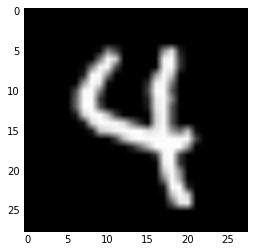

In [22]:
displayImage()

Actual digit: 4
Classification Model prediction: 4


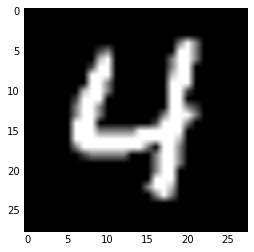

In [23]:
displayImage()

Actual digit: 2
Classification Model prediction: 2


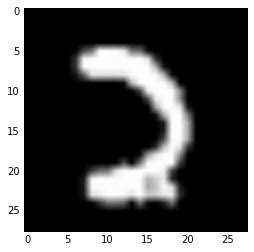

In [24]:
displayImage()

Actual digit: 2
Classification Model prediction: 2


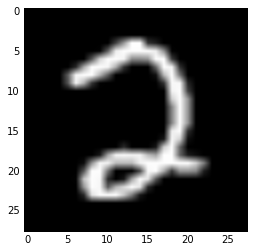

In [25]:
displayImage()

## Summary

Through a few iterations of our model, we have nearly achieved perfect accuracy.

In general, deep learning works best when looking at several terabytes of data. Processing this amount of data is essentially impossible on a single computer and thus requires the use of a computer with several GPUs or some cloud computing technology (IBM Cloud Compute, Google Cloud Platform, etc).

The best way to improve the model's performance is to use more computing power. This comes in the form of using a more powerful computer with at least one GPU. Another option is to move all computation to the cloud. By doing these things, you can increase how fast the models work. This will allow you to use a much larger data set to train the algorithm. The more data, the more accurate the model. 